这里显示 PCA分析

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import io as spio

可视化数据

In [2]:
def plot_data_2d(X,marker):
    plt.plot(X[:,0],X[:,1],marker) 
    return plt

def drawline(plt,p1,p2,line_type):
    plt.plot(np.array([p1[0],p2[0]]),np.array([p1[1],p2[1]]),line_type)  

    
def display_imageData(imgData):
    sum = 0
    '''
    显示100个数（若是一个一个绘制将会非常慢，可以将要画的图片整理好，放到一个矩阵中，显示这个矩阵即可）
    - 初始化一个二维数组
    - 将每行的数据调整成图像的矩阵，放进二维数组
    - 显示即可
    '''
    m,n = imgData.shape
    width = np.int32(np.round(np.sqrt(n)))
    height = np.int32(n/width)
    rows_count = np.int32(np.floor(np.sqrt(m)))
    cols_count = np.int32(np.ceil(m/rows_count))
    pad = 1
    display_array = -np.ones((pad+rows_count*(height+pad),pad+cols_count*(width+pad)))
    for i in range(rows_count):
        for j in range(cols_count):
            max_val = np.max(np.abs(imgData[sum,:]))
            display_array[pad+i*(height+pad):pad+i*(height+pad)+height,pad+j*(width+pad):pad+j*(width+pad)+width] = imgData[sum,:].reshape(height,width,order="F")/max_val    # order=F指定以列优先，在matlab中是这样的，python中需要指定，默认以行
            sum += 1
            
    plt.imshow(display_array,cmap='gray')   # 显示灰度图像
    plt.axis('off')
    plt.show()

归一化以及映射

In [3]:
def featureNormalize(X):
    '''（每一个数据-当前列的均值）/当前列的标准差'''
    n = X.shape[1]
    mu = np.zeros((1,n))
    sigma = np.zeros((1,n))
    
    mu = np.mean(X,axis=0)   # axis=0表示列
    sigma = np.std(X,axis=0)
    for i in range(n):
        X[:,i] = (X[:,i]-mu[i])/sigma[i]
    return X,mu,sigma

def projectData(X_norm,U,K):
    Z = np.zeros((X_norm.shape[0],K))
    
    U_reduce = U[:,0:K]          # 取前K个
    Z = np.dot(X_norm,U_reduce) 
    return Z

数据恢复

In [4]:
def recoverData(Z,U,K):
    X_rec = np.zeros((Z.shape[0],U.shape[0]))
    U_recude = U[:,0:K]
    X_rec = np.dot(Z,np.transpose(U_recude))  # 还原数据（近似）
    return X_rec

### 2维数据降维1维

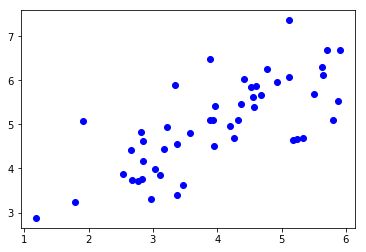

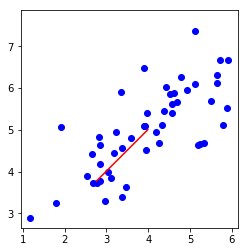

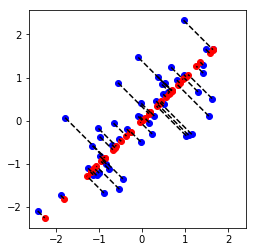

In [5]:
data_2d = spio.loadmat("../data/6-PCA/data.mat")
X = data_2d['X']
m = X.shape[0]
plt = plot_data_2d(X,'bo')  # 显示二维的数据
plt.show()

X_copy = X.copy()
X_norm,mu,sigma = featureNormalize(X_copy)    # 归一化数据
#plot_data_2d(X_norm)    # 显示归一化后的数据
#plt.show()

Sigma = np.dot(np.transpose(X_norm),X_norm)/m  # 求Sigma
U,S,V = np.linalg.svd(Sigma)       # 求Sigma的奇异值分解

plt = plot_data_2d(X,'bo')  # 显示原本数据
drawline(plt, mu, mu+S[0]*(U[:,0]), 'r-')  # 线，为投影的方向

plt.axis('square')
plt.show()

K = 1  # 定义降维多少维（本来是2维的，这里降维1维）
'''投影之后数据（降维之后）'''
Z = projectData(X_norm,U,K)   # 投影
'''恢复数据'''
X_rec = recoverData(Z,U,K)    # 恢复
'''作图-----原数据与恢复的数据'''
plt = plot_data_2d(X_norm,'bo')
plot_data_2d(X_rec,'ro')
for i in range(X_norm.shape[0]):
    drawline(plt, X_norm[i,:], X_rec[i,:], '--k')
plt.axis('square')
plt.show()


### 图像数据降维

加载图像数据.....


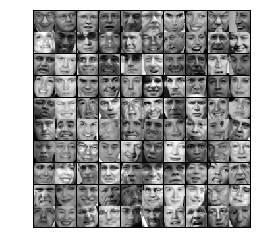

运行PCA....


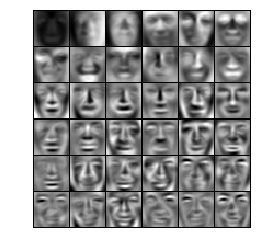

对face数据降维.....
投影之后Z向量的大小：5000 100
显示降维之后的数据......


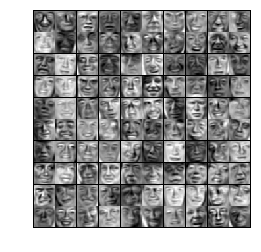

In [6]:
print (u'加载图像数据.....')
data_image = spio.loadmat('../data/6-PCA/data_faces.mat')
X = data_image['X']
display_imageData(X[0:100,:])
m = X.shape[0]  # 数据条数

print(u'运行PCA....')
X_norm,mu,sigma = featureNormalize(X)  # 归一化

Sigma = np.dot(np.transpose(X_norm),X_norm)/m  # 求Sigma
U,S,V = np.linalg.svd(Sigma)                   # 奇异值分解
display_imageData(np.transpose(U[:,0:36]))     # 显示U的数据

print(u'对face数据降维.....')
K = 100     # 降维100维(原先是32*32=1024维的)
Z = projectData(X_norm, U, K)
print(u'投影之后Z向量的大小：%d %d' %Z.shape)

print(u'显示降维之后的数据......')
X_rec = recoverData(Z, U, K) # 恢复数据
display_imageData(X_rec[0:100,:])
  